In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj, basis, qeye, identity, mesolve

## Parameters definition

In [2]:
# Grid settings
N = 200                  # Number of position points
L = 1.0                  # Length of the total well (in arbitrary units)
L0 = 0.5                 # Position of the border between first well region (in arbitrary units) where potential is 0 and the rest
x = np.linspace(0, L, N) # Position grid
dx = x[1] - x[0]         # Position resolution
V0 = 1000                # Potential level

## Operator definition

In [3]:
# Construct the finite-difference Laplacian (second derivative)
D2 = -2 * np.eye(N)
for i in range(N - 1):
    D2[i, i+1] = D2[i+1, i] = 1

T = -0.5 * Qobj(D2) / dx**2  # Kinetic energy operator

# Initialize potential as zeros
Vx = np.zeros(N)

# Set potential = V0 outside [1/3, 2/3]
Vx[x < L0] = 0
Vx[x > L0] = V0

V = Qobj(np.diag(Vx))  # Potential energy operator

H = T + V  # Total Hamiltonian


## Eigenstate equation resolution

In [4]:

eigenstates = H.eigenstates()
energies = eigenstates[0]
states = eigenstates[1]


## Plot

/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


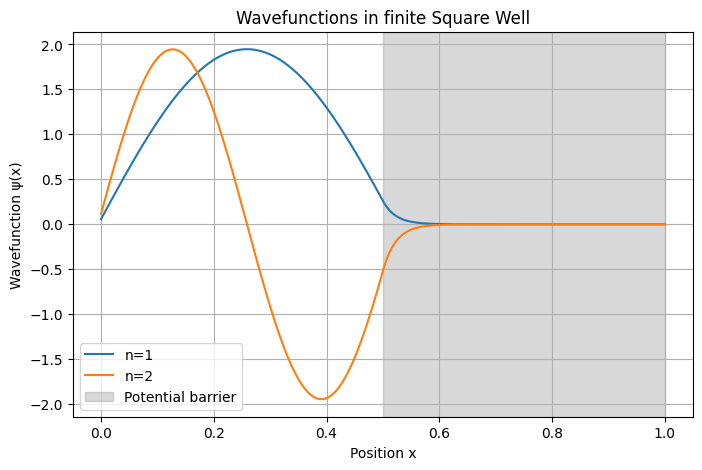

In [7]:
plt.figure(figsize=(8, 5))
for i in range(2):
    psi = states[i].full().flatten()
    plt.plot(x, psi / np.sqrt(dx), label=f'n={i+1}')
# Shade the potential barriers (V ≠ 0)
plt.axvspan(L0, L, color='gray', alpha=0.3, label='Potential barrier')
plt.title("Wavefunctions in finite Square Well")
plt.xlabel("Position x")
plt.ylabel("Wavefunction ψ(x)")
plt.legend()
plt.grid(True)
plt.show()